<a href="https://colab.research.google.com/github/TheLittlePrincess/Final_project/blob/Ana_W2/routes_with_zips_S3_and_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# replacing files on the drive for those on the S3
# S3 link to be used:      s3://finalprojectaustintrash
# from google.colab import drive
# drive.mount('/content/drive')


Mounted at /content/drive


In [13]:
!sudo pip install geopandas
!sudo pip install pygeos
!pip install rtree
!sudo apt-get install -y libspatialindex-dev
!sudo apt-get install -y python-rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-rtree is already the newest version (0.8.3+ds-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [14]:
#new to S3 use
!pip install fsspec

In [15]:
#new for S3 use
!pip install s3fs

In [16]:
import pandas as pd
import numpy as np
import csv
import geopandas as gpd
from shapely.geometry import Polygon, mapping, Point
from rtree import Rtree
import pygeos

In [17]:
#read the routes file that contains one point per route
routes = pd.read_csv("s3://finalprojectaustintrash/Routes_Tableau.csv")

In [18]:
routes.head()

,Garb Rt,Geometry (Garbage Routes.geojson),Latitude (generated),Longitude (generated)
0,PW41,MultiPolygon,30.358764,-97.669893
1,PW40,MultiPolygon,30.363255,-97.674997
2,PW32,MultiPolygon,30.371456,-97.641614
3,PW31,MultiPolygon,30.384221,-97.683817
4,PW30,MultiPolygon,30.370076,-97.662850


In [9]:
#routes to dataframe
#routes_df = gpd.GeoDataFrame(routes, geometry=gpd.points_from_xy(routes["Longitude (generated)"], routes["Latitude (generated)"]))

In [10]:
#trouble shooting for reading
#zips_forread= pd.read_csv("s3://finalprojectaustintrash/austin_area_zip_codes.csv")

In [11]:
zips_forread.head()

,the_geom,geodb_oid,objectid,zipcodes_i,zipcode,name,created_by,created_da,modified_b,modified_d,shape_area,shape_len,cartodb_id,created_at,updated_at
0,0106000020E61000000100000001030000000100000077...,3,3,56,78739,AUSTIN,NaN,NaN,NaN,NaN,3.383405e+08,97785.793334,3,2015-06-07 00:48:14.456593+00,2015-06-07 00:48:14.456593+00
1,0106000020E61000000100000001030000000100000023...,4,4,57,78645,LEANDER,NaN,NaN,NaN,NaN,1.043396e+09,196654.442800,4,2015-06-07 00:48:14.456593+00,2015-06-07 00:48:14.456593+00
2,0106000020E6100000010000000103000000010000004E...,16,16,10,78602,BASTROP,NaN,NaN,NaN,NaN,5.914482e+09,506803.883037,9,2015-06-07 00:48:14.456593+00,2015-06-07 00:48:14.456593+00
3,0106000020E610000001000000010300000001000000FA...,17,17,11,78655,MARTINDALE,NaN,NaN,NaN,NaN,1.846886e+09,212904.793003,10,2015-06-07 00:48:14.456593+00,2015-06-07 00:48:14.456593+00
4,0106000020E61000000100000001030000000100000048...,18,18,12,78617,DEL VALLE,NaN,NaN,NaN,NaN,1.885224e+09,273994.824301,11,2015-06-07 00:48:14.456593+00,2015-06-07 00:48:14.456593+00


In [ ]:
#zips = gpd.read_file("s3://finalprojectaustintrash/austin_area_zip_codes.csv",GEOM_POSSIBLE_NAMES="the_geom", KEEP_GEOM_COLUMNS="NO")

In [19]:
# download csv file from GitHub public repo using wget
!wget "https://raw.githubusercontent.com/TheLittlePrincess/Final_project/main/austin_area_zip_codes.csv"

--2021-06-01 18:52:16--  https://raw.githubusercontent.com/TheLittlePrincess/Final_project/main/austin_area_zip_codes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1231882 (1.2M) [text/plain]
Saving to: ‘austin_area_zip_codes.csv’

austin_area_zip_cod 100%[===================>]   1.17M  --.-KB/s    in 0.1s    

2021-06-01 18:52:16 (9.93 MB/s) - ‘austin_area_zip_codes.csv’ saved [1231882/1231882]



In [ ]:
# confirm the file was downloaded
!ls

In [21]:
# check file location and create base directory variable
# base_dir will be a list with a single list item, but we need it to be a string
# so we'll just grab the first index
base_dir = !pwd
!pwd
type(base_dir[0])

/content


str

In [22]:
# use base directory and filename to create the geopandas dataframe
zips = gpd.read_file(f"{base_dir[0]}/austin_area_zip_codes.csv",GEOM_POSSIBLE_NAMES="the_geom", KEEP_GEOM_COLUMNS="NO")
zips.head()

,geodb_oid,objectid,zipcodes_i,zipcode,name,created_by,created_da,modified_b,modified_d,shape_area,shape_len,cartodb_id,created_at,updated_at,geometry
0,3,3,56,78739,AUSTIN,,,,,338340541.543711,97785.7933337692,3,2015-06-07 00:48:14.456593+00,2015-06-07 00:48:14.456593+00,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,4,4,57,78645,LEANDER,,,,,1043395959.57919,196654.442799695,4,2015-06-07 00:48:14.456593+00,2015-06-07 00:48:14.456593+00,"MULTIPOLYGON (((-97.91075 30.50110, -97.91053 ..."
2,16,16,10,78602,BASTROP,,,,,5914481887.52673,506803.883036815,9,2015-06-07 00:48:14.456593+00,2015-06-07 00:48:14.456593+00,"MULTIPOLYGON (((-97.27371 30.29662, -97.27323 ..."
3,17,17,11,78655,MARTINDALE,,,,,1846885535.93133,212904.793002763,10,2015-06-07 00:48:14.456593+00,2015-06-07 00:48:14.456593+00,"MULTIPOLYGON (((-97.73690 29.78761, -97.73582 ..."
4,18,18,12,78617,DEL VALLE,,,,,1885223526.51104,273994.824301404,11,2015-06-07 00:48:14.456593+00,2015-06-07 00:48:14.456593+00,"MULTIPOLYGON (((-97.51624 30.21906, -97.51600 ..."


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 20)

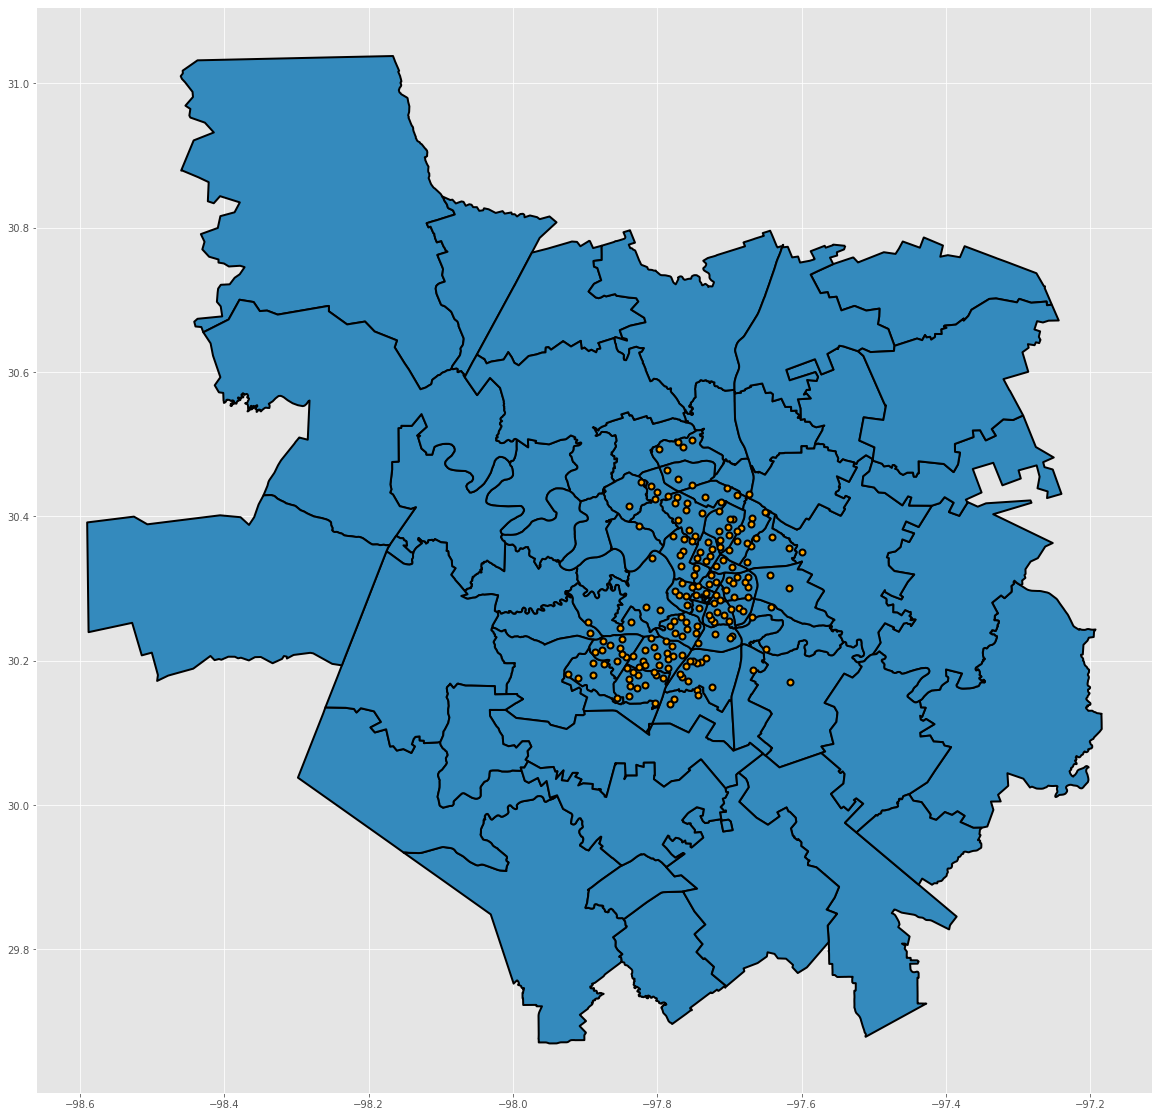

In [24]:

fig, ax = plt.subplots()

zips.geometry.plot(color=None, edgecolor='k',linewidth = 2,ax=ax)
routes_df.geometry.plot(color='Orange', edgecolor='k',linewidth = 2,ax=ax)

In [25]:
zip_coords = zips[['zipcode','geometry']]

route_coords = routes_df[['Garb Rt','geometry']]

In [26]:
zip_coords

,zipcode,geometry
0,78739,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78645,"MULTIPOLYGON (((-97.91075 30.50110, -97.91053 ..."
2,78602,"MULTIPOLYGON (((-97.27371 30.29662, -97.27323 ..."
3,78655,"MULTIPOLYGON (((-97.73690 29.78761, -97.73582 ..."
4,78617,"MULTIPOLYGON (((-97.51624 30.21906, -97.51600 ..."
...,...,...
75,78660,"MULTIPOLYGON (((-97.57653 30.50086, -97.57450 ..."
76,78662,"MULTIPOLYGON (((-97.45105 30.01521, -97.44517 ..."
77,78705,"MULTIPOLYGON (((-97.72978 30.29871, -97.72893 ..."
78,78701,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ..."


In [27]:
route_coords

,Garb Rt,geometry
0,PW41,POINT (-97.66989 30.35876)
1,PW40,POINT (-97.67500 30.36326)
2,PW32,POINT (-97.64161 30.37146)
3,PW31,POINT (-97.68382 30.38422)
4,PW30,POINT (-97.66285 30.37008)
...,...,...
179,PAF50,POINT (-97.77022 30.29098)
180,PAF04,POINT (-97.77542 30.29641)
181,PAF03,POINT (-97.76675 30.33084)
182,PAF02,POINT (-97.76568 30.30814)


In [28]:
route_coords.dtypes

Garb Rt       object
geometry    geometry
dtype: object

In [31]:
# This cycles through all of the route coords and prints the coords with the zip code. Next step, change the print to a return, and then apply it to a new zip column in the route_df. 
#DICT TO CONTAIN POINT AND ZIP
point_and_route = {"point":[], "zip":[]};
for j in route_coords['geometry']:
    idx = 0
    found = 0
    while (found == 0):
        if Point(j).within(zip_coords['geometry'][idx]) or Point(j).intersects(zip_coords['geometry'][idx]):
            point_and_route["point"].append(str(j))
            point_and_route["zip"].append(str(zip_coords['zipcode'][idx]))
            found = 1
        else:
            idx += 1

In [32]:
route_coords["POINT"] = point_and_route["point"]

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [33]:
route_coords["ZIP"] = point_and_route["zip"]

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [34]:
route_coords

,Garb Rt,geometry,POINT,ZIP
0,PW41,POINT (-97.66989 30.35876),POINT (-97.66989257 30.35876415),78754
1,PW40,POINT (-97.67500 30.36326),POINT (-97.67499719 30.36325543),78753
2,PW32,POINT (-97.64161 30.37146),POINT (-97.64161360999999 30.37145619),78754
3,PW31,POINT (-97.68382 30.38422),POINT (-97.68381677000001 30.38422137),78753
4,PW30,POINT (-97.66285 30.37008),POINT (-97.66284967999999 30.37007561),78754
...,...,...,...,...
179,PAF50,POINT (-97.77022 30.29098),POINT (-97.77021897 30.29097973),78703
180,PAF04,POINT (-97.77542 30.29641),POINT (-97.77542129 30.29641263),78703
181,PAF03,POINT (-97.76675 30.33084),POINT (-97.76674749999999 30.33084492),78731
182,PAF02,POINT (-97.76568 30.30814),POINT (-97.76567716 30.30814288),78703


In [35]:
# Import df_2017_routes (from waste_data_etl and on S3)
df_2017_routes = pd.read_csv("s3://finalprojectaustintrash/routes_2017_weight.csv")
df_2017_routes.head()


,route_number,load_weight,the_geom
0,PAF01,632960.0,MULTIPOLYGON (((-97.80021375787697 30.36733765...
1,PAF02,678100.0,MULTIPOLYGON (((-97.77221898831849 30.32271999...
2,PAF03,649520.0,MULTIPOLYGON (((-97.7601229300713 30.340361143...
3,PAF04,651640.0,MULTIPOLYGON (((-97.77662750513846 30.30588241...
4,PAF50,545080.0,MULTIPOLYGON (((-97.7724542400386 30.297463218...


In [ ]:
 #Merge route_cords and df_2017_routes (from waste_data_etl and on S3) on Garb Rt AND route_number to have the weight added to the first or the zip to the second

In [ ]:
# confirm there is only one zip code per route (there are multiple routes per zipcode)

In [ ]:
# list the routes per zip i.e for zip 78754 routes are PW41,PW32 and PW30 AND sum the weight per zipcode like groupby.(ZIP).su

In [ ]:
# Import full_zip_codes table
df_full_zip_codes = pd.read_csv("s3://finalprojectaustintrash/full_zip_codes.csv")
df_full_zip_codes.head()

In [ ]:
# Add (merge or append?) the weight per zip code to the full_zip_codes table. AND the if possible add the list of routes per zipcode
df_zipcodes_housing_grb = 
df_zipcodes_housing_grb.head()


In [ ]:
#Drop na
df_zipcodes_housing_grb = df_zipcodes_housing_grb.dropna()
df_zipcodes_housing_grb.head()

In [ ]:
# Export final table the one to feed the model (full_zip_codes table PLUS weight and if possible routes)
# Can we export it directly to S3?
df_zipcodes_housing_grb.to_csv("Austin_zipcodes_housing_grb.csv")

In [ ]:
# This cycles through all of the route coords and prints the coords with the zip code. Next step, change the print to a return, and then apply it to a new zip column in the route_df. 

for j in route_coords['geometry']:
  idx = 0 
  found = 0
  while (found == 0):
    
      if Point(j).within(zip_coords['geometry'][idx]) or Point(j).intersects(zip_coords['geometry'][idx]):
        print("Route coordinate " + str(j) + " is within " + str(zip_coords['zipcode'][idx]))
        found = 1
      else:
        idx += 1


Route coordinate POINT (-97.66989257 30.35876415) is within 78754
Route coordinate POINT (-97.67499719 30.36325543) is within 78753
Route coordinate POINT (-97.64161360999999 30.37145619) is within 78754
Route coordinate POINT (-97.68381677000001 30.38422137) is within 78753
Route coordinate POINT (-97.66284967999999 30.37007561) is within 78754
Route coordinate POINT (-97.73279568 30.20325809) is within 78744
Route coordinate POINT (-97.69497543 30.39644282) is within 78758
Route coordinate POINT (-97.69955125 30.39597405) is within 78758
Route coordinate POINT (-97.66796929 30.39818178) is within 78753
Route coordinate POINT (-97.66960129 30.38997468) is within 78753
Route coordinate POINT (-97.6726405 30.43033551) is within 78728
Route coordinate POINT (-97.73912405999999 30.19830731) is within 78744
Route coordinate POINT (-97.7453337 30.19699304) is within 78744
Route coordinate POINT (-97.75034690000001 30.19927324) is within 78744
Route coordinate POINT (-97.71946995 30.23651855

Route coordinate POINT (-97.84809310999999 30.20968466) is within 78749
Route coordinate POINT (-97.85528228 30.19935845) is within 78749
Route coordinate POINT (-97.85100554 30.21752904) is within 78749
Route coordinate POINT (-97.83827474 30.16423859) is within 78748
Route coordinate POINT (-97.83846240000001 30.17505459) is within 78748
Route coordinate POINT (-97.8333554 30.18407939) is within 78748
Route coordinate POINT (-97.83849915 30.15132371) is within 78748
Route coordinate POINT (-97.85634695 30.14834064) is within 78739
Route coordinate POINT (-97.90996507 30.17641761) is within 78739
Route coordinate POINT (-97.88555881000001 30.21160525) is within 78749
Route coordinate POINT (-97.87355782 30.19606697) is within 78739
Route coordinate POINT (-97.88840938 30.1796546) is within 78739
Route coordinate POINT (-97.88888296 30.19741055) is within 78739
Route coordinate POINT (-97.92387825 30.18106669) is within 78739
Route coordinate POINT (-97.71322032 30.36727167) is within 

In [ ]:

# We need this part because it needs to go through each polygon to check the route points
#def find_within_zipcode(coord):
  # for each row in zip_coords, is coord in that row's polygon?
  #return current_row["zipcode"]

def find_zipcode(row): 
    try:
      coord = route_coord["geometry"]
      # if find_within_zipcode returns something, return that value from this function
      # else, return null value
      if coord.within(zip_coords['geometry'][row.index]) or coord.intersects(zip_coords['geometry'][row.index]):
        return zip_coords["zipcode"][row.index]
    except:
      return "00000"

In [ ]:
# This is to tinker with to see if we can get it to work.
# idx = 0
# for j in route_coords["geometry"].values:
#     try:
#       if Point(j).within(zip_coords['geometry'][idx]) or Point(j).intersects(zip_coords['geometry'][idx]):
#         routes_coords.append(j, zip_coords['zipcode'][idx])
#     except:
#       pass
#     idx+=1

In [ ]:
route_coords["zip"] = route_coords.apply(
    lambda row: find_zipcode(row), axis=1)
print(route_coords)

In [ ]:
set(route_coords["zip"].values)